# Building Features from Numeric Data

Course materials - Janani Ravi (Pluralsight)

## Import libraries and data

In [546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, scale, RobustScaler, Normalizer, Binarizer,KBinsDiscretizer,MaxAbsScaler,\
MinMaxScaler, FunctionTransformer,PolynomialFeatures, PowerTransformer,QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [362]:
# Absenteeism dataset
df = pd.read_csv("C:/Users/imoge/Projects/Datasets/Absenteeism_at_work.csv")

In [363]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [365]:
# Pick columns to be used in the analysis
df = df[["Transportation expense","Distance from Residence to Work","Service time",
        "Age","Work load Average/day ","Weight","Height","Body mass index",
        "Absenteeism time in hours"]]

In [366]:
df.columns = ["TransportExp","Distance","Service","Age","WorkloadAv","Weight","Height","BMI","Absent"]

In [367]:
df.head()

,TransportExp,Distance,Service,Age,WorkloadAv,Weight,Height,BMI,Absent
0,289,36,13,33,239.554,90,172,30,4
1,118,13,18,50,239.554,98,178,31,0
2,179,51,18,38,239.554,89,170,31,2
3,279,5,14,39,239.554,68,168,24,4
4,289,36,13,33,239.554,90,172,30,2


In [368]:
# Convert all to float type
df = df.astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TransportExp  740 non-null    float64
 1   Distance      740 non-null    float64
 2   Service       740 non-null    float64
 3   Age           740 non-null    float64
 4   WorkloadAv    740 non-null    float64
 5   Weight        740 non-null    float64
 6   Height        740 non-null    float64
 7   BMI           740 non-null    float64
 8   Absent        740 non-null    float64
dtypes: float64(9)
memory usage: 52.2 KB


In [369]:
df.describe()

,TransportExp,Distance,Service,Age,WorkloadAv,Weight,Height,BMI,Absent
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,221.329730,29.631081,12.554054,36.450000,271.490235,79.035135,172.114865,26.677027,6.924324
std,66.952223,14.836788,4.384873,6.478772,39.058116,12.883211,6.034995,4.285452,13.330998
min,118.000000,5.000000,1.000000,27.000000,205.917000,56.000000,163.000000,19.000000,0.000000
25%,179.000000,16.000000,9.000000,31.000000,244.387000,69.000000,169.000000,24.000000,2.000000
50%,225.000000,26.000000,13.000000,37.000000,264.249000,83.000000,170.000000,25.000000,3.000000
75%,260.000000,50.000000,16.000000,40.000000,294.217000,89.000000,172.000000,31.000000,8.000000
max,388.000000,52.000000,29.000000,58.000000,378.884000,108.000000,196.000000,38.000000,120.000000


The mean and standard deviation values are very different between features

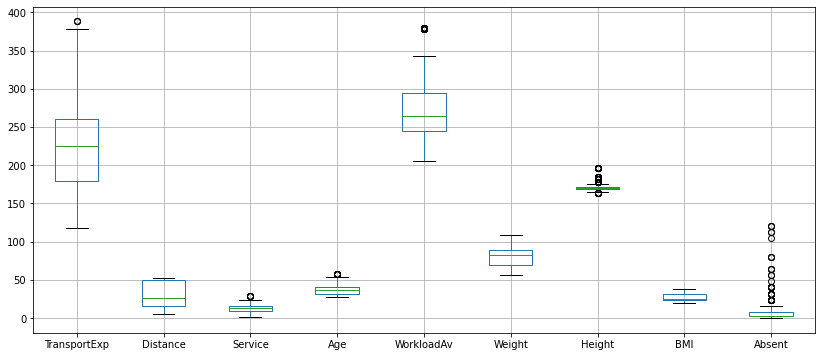

In [370]:
fig, ax = plt.subplots(figsize = (14,6))
df.boxplot();

Height and Abseenteeism have a number of outliers

# Feature Scaling

Applied feature wise

## Standard scaler

In [371]:
# Zero mean and unit variance (z-scores). Does not include Bessels correction (n-1)
scaled = StandardScaler()
df_scaled = pd.DataFrame(scaled.fit_transform(df))
df_scaled.columns = df.columns

In [372]:
df_scaled.describe()

,TransportExp,Distance,Service,Age,WorkloadAv,Weight,Height,BMI,Absent
count,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02
mean,6.601326e-17,-5.911187e-17,-3.660735e-17,-4.626929e-16,1.721664e-15,2.794311e-17,-1.015329e-15,-1.215244e-16,9.751959e-17
std,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00
min,-1.544379e+00,-1.661258e+00,-2.636762e+00,-1.459596e+00,-1.679999e+00,-1.789206e+00,-1.511357e+00,-1.792627e+00,-5.197666e-01
25%,-6.326655e-01,-9.193567e-01,-8.110742e-01,-8.417777e-01,-6.943900e-01,-7.794581e-01,-5.164829e-01,-6.251003e-01,-3.696389e-01
50%,5.485632e-02,-2.449005e-01,1.017698e-01,8.495004e-02,-1.855218e-01,3.079626e-01,-3.506706e-01,-3.915949e-01,-2.945750e-01
75%,5.779707e-01,1.373794e+00,7.864028e-01,5.483139e-01,5.822640e-01,7.740000e-01,-1.904601e-02,1.009438e+00,8.074438e-02
max,2.491075e+00,1.508686e+00,3.753146e+00,3.328497e+00,2.751449e+00,2.249785e+00,3.960449e+00,2.643976e+00,8.487898e+00


In [373]:
# Access the means, variances and standard deviations of the scaler
print(scaled.mean_)
print(scaled.var_)
print(scaled.scale_)

[221.32972973  29.63108108  12.55405405  36.45       271.49023514
  79.03513514 172.11486486  26.67702703   6.92432432]
[4476.54262966  219.83281775   19.20113221   41.91777027 1523.47490444
  165.75281958   36.3719412    18.34028305  177.47535427]
[66.90696996 14.82676019  4.38190965  6.47439343 39.03171665 12.87450269
  6.03091545  4.28255567 13.32198762]


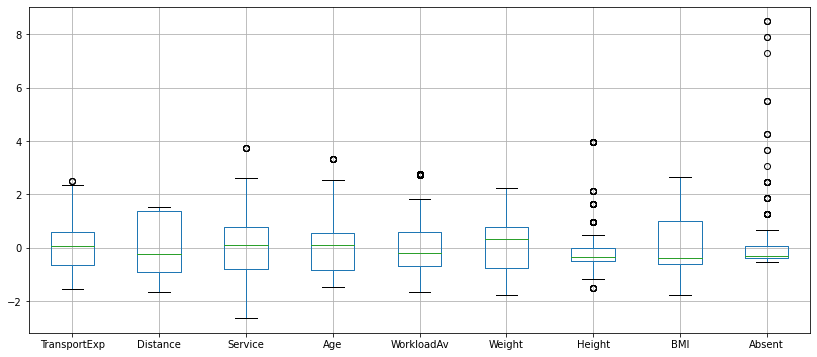

In [374]:
fig, ax = plt.subplots(figsize = (14,6))
df_scaled.boxplot();

## Robust Scaler

Useful if there are many outliers. Uses the median and interquartile range which are not sensitive to outliers rather than the mean and standard deviation

In [375]:
df.head()

,TransportExp,Distance,Service,Age,WorkloadAv,Weight,Height,BMI,Absent
0,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,4.0
1,118.0,13.0,18.0,50.0,239.554,98.0,178.0,31.0,0.0
2,179.0,51.0,18.0,38.0,239.554,89.0,170.0,31.0,2.0
3,279.0,5.0,14.0,39.0,239.554,68.0,168.0,24.0,4.0
4,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,2.0


In [376]:
robust = RobustScaler()
robust_scaled = pd.DataFrame(robust.fit_transform(df))
robust_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.790123,0.294118,0.000000,-0.444444,-0.495585,0.35,0.666667,0.714286,0.166667
1,-1.320988,-0.382353,0.714286,1.444444,-0.495585,0.75,2.666667,0.857143,-0.500000
2,-0.567901,0.735294,0.714286,0.111111,-0.495585,0.30,0.000000,0.857143,-0.166667
3,0.666667,-0.617647,0.142857,0.222222,-0.495585,-0.75,-0.666667,-0.142857,0.166667
4,0.790123,0.294118,0.000000,-0.444444,-0.495585,0.35,0.666667,0.714286,-0.166667


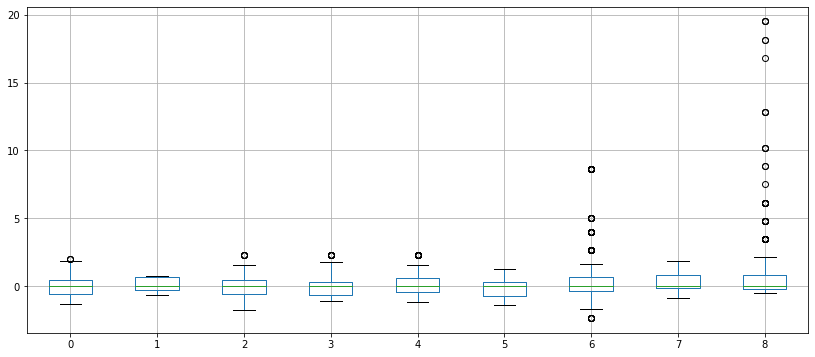

In [377]:
fig, ax = plt.subplots(figsize = (14,6))
robust_scaled.boxplot();

# Normalization

Applied row wise where each row is a vector which is converted to unit norm (unit magnitude). Useful for those ML models that rely on cosine similarity.

In [378]:
data = pd.read_csv("C:/Users/imoge/Projects/Datasets/data_1024.csv", sep = "\t")

In [379]:
data.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [380]:
data.drop(columns = "Driver_ID",axis = 1, inplace = True)
data.columns = ["Distance","Speed"]

In [381]:
data.head()

,Distance,Speed
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


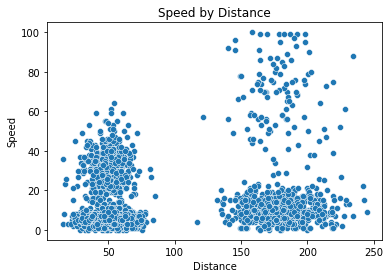

In [382]:
sns.scatterplot(data = data,x = "Distance",y = "Speed")
plt.title("Speed by Distance");

In [383]:
norm = Normalizer()
norm_df = pd.DataFrame(norm.fit_transform(data))
norm_df.columns = ["Distance","Speed"]
norm_df.head()

,Distance,Speed
0,0.930694,0.365798
1,0.902956,0.429733
2,0.922526,0.385934
3,0.930058,0.367414
4,0.909165,0.416437


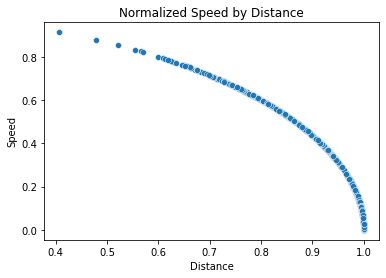

In [384]:
sns.scatterplot(data = norm_df,x = "Distance",y = "Speed")
plt.title("Normalized Speed by Distance");

Can also use L1 norm or max norm but these do not help with algorithms that rely on cosine similarity

# Converting Continuous Variables to Categorical Form

## Binarizer

Values above a threshold = 1 and those below are converted to 0

In [385]:
diet = pd.read_csv("C:/Users/imoge/Projects/Datasets/diet_data.csv")

In [386]:
diet.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,08/01/18,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,08/02/18,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,08/03/18,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [387]:
diet.dropna(inplace = True)
diet.drop(columns = ["Date","Stone","Pounds","Ounces"],axis = 1, inplace = True)

In [388]:
diet.head()

,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [389]:
diet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 142
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weight_oz    140 non-null    float64
 1   calories     140 non-null    float64
 2   cals_per_oz  140 non-null    object 
 3   five_donuts  140 non-null    float64
 4   walk         140 non-null    float64
 5   run          140 non-null    float64
 6   wine         140 non-null    float64
 7   prot         140 non-null    float64
 8   weight       140 non-null    float64
 9   change       140 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.0+ KB


In [390]:
diet['cals_per_oz'] = pd.to_numeric(diet['cals_per_oz'], errors='coerce')

In [391]:
diet_median = diet['calories'].median()
diet_median

2575.0

In [392]:
binarizer = Binarizer(threshold = diet_median)

In [393]:
diet["above_median"] = binarizer.fit_transform(diet[["calories"]])
diet.head()

,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change,above_median
0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0,0.0
1,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0
2,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0,0.0
4,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0,1.0


## KbinsDiscretizer

Converts into categorical data but into a specified number of categories or bins. Uniform bin widths for each feature, quantile - each bin in each feature has the same number of samples or Kmeans so the bins are based on the centroids in clusters

In [394]:
student = pd.read_csv("C:/Users/imoge/Projects/Datasets/student_performance.csv")

In [395]:
student.head()

,Hours Studied,Score Obtained,Outliers
0,22,0.869736,False
1,26,0.912112,False
2,45,1.143020,False
3,46,1.156660,False
4,50,1.212843,False


In [396]:
student.shape

(122, 3)

In [397]:
student.describe()

,Hours Studied,Score Obtained
count,122.000000,122.000000
mean,519.131148,56.665412
std,316.030884,39.929084
min,22.000000,0.869736
25%,225.750000,13.000000
50%,525.000000,78.582806
75%,829.000000,98.510907
max,992.000000,99.899724


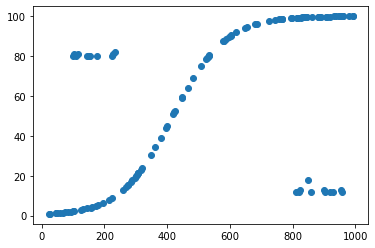

In [398]:
plt.scatter(x = student["Hours Studied"], y = student["Score Obtained"]);

In [399]:
kbins = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'uniform') # ordinal - bins are integer values, strategy - bin width the same

In [400]:
kbins_transformed = kbins.fit_transform(student[["Hours Studied","Score Obtained"]])

In [401]:
kbins_transformed.shape

(122, 2)

In [402]:
new_df = pd.DataFrame(kbins_transformed, columns = ["Binned Hours","Binned Scores"])
new_df.head()

,Binned Hours,Binned Scores
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [403]:
student_all = pd.concat([student,new_df],axis = 1)
student_all.sample(5)

,Hours Studied,Score Obtained,Outliers,Binned Hours,Binned Scores
104,903,12.000000,True,2.0,0.0
83,797,98.968717,False,2.0,2.0
96,850,18.000000,True,2.0,0.0
16,124,2.897272,False,0.0,0.0
47,347,30.237790,False,1.0,0.0


In [404]:
# Finding outliers
out = student_all[student_all["Binned Hours"]!=student_all["Binned Scores"]]
out.head()

,Hours Studied,Score Obtained,Outliers,Binned Hours,Binned Scores
11,100,80.0,True,0.0,2.0
12,102,81.0,True,0.0,2.0
14,110,80.0,True,0.0,2.0
15,115,81.0,True,0.0,2.0
19,144,80.0,True,0.0,2.0


In [405]:
out["Comment"] = ""

C:\Users\imoge\AppData\Local\Temp/ipykernel_27000/1085002635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out["Comment"] = ""


In [406]:
student_all.loc[(student_all['Binned Scores'] -student_all['Binned Hours'])==2, 'Comment'] ="Suspicious"
student_all.loc[(student_all['Binned Scores'] -student_all['Binned Hours'])==-2, 'Comment'] ="Needs Help"

In [407]:
student_all['Comment']=student_all['Comment'].fillna("")

In [411]:
student_all.sample(5)

,Hours Studied,Score Obtained,Outliers,Binned Hours,Binned Scores,Comment
85,813,99.147339,False,2.0,2.0,
104,903,12.000000,True,2.0,0.0,Needs Help
4,50,1.212843,False,0.0,0.0,
119,978,99.881402,False,2.0,2.0,
60,524,78.380848,False,1.0,2.0,


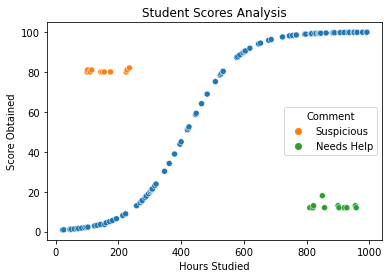

In [415]:
sns.scatterplot(x = student_all["Hours Studied"], y = student_all["Score Obtained"],hue = student_all["Comment"])
plt.title("Student Scores Analysis");

## Scaling

### MaxAbs Scaler

Scales to -1 to 1 without breaking the sparsity in the data

In [417]:
df = pd.read_csv("C:/Users/imoge/Projects/Datasets/Absenteeism_at_work.csv")

In [418]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [419]:
df = df[["Transportation expense","Distance from Residence to Work","Service time",
        "Age","Work load Average/day ","Weight","Height","Body mass index",
        "Absenteeism time in hours"]]

In [420]:
df.columns = ["TransportExp","Distance","Service","Age","WorkloadAv","Weight","Height","BMI","Absent"]

In [421]:
df = df.astype(np.float64)

In [422]:
df.head()

,TransportExp,Distance,Service,Age,WorkloadAv,Weight,Height,BMI,Absent
0,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,4.0
1,118.0,13.0,18.0,50.0,239.554,98.0,178.0,31.0,0.0
2,179.0,51.0,18.0,38.0,239.554,89.0,170.0,31.0,2.0
3,279.0,5.0,14.0,39.0,239.554,68.0,168.0,24.0,4.0
4,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,2.0


In [426]:
maxabsscaler = MaxAbsScaler()
scaled_df = pd.DataFrame(maxabsscaler.fit_transform(df))
scaled_df.columns = df.columns

In [427]:
scaled_df.head()

,TransportExp,Distance,Service,Age,WorkloadAv,Weight,Height,BMI,Absent
0,0.744845,0.692308,0.448276,0.568966,0.632262,0.833333,0.877551,0.789474,0.033333
1,0.304124,0.250000,0.620690,0.862069,0.632262,0.907407,0.908163,0.815789,0.000000
2,0.461340,0.980769,0.620690,0.655172,0.632262,0.824074,0.867347,0.815789,0.016667
3,0.719072,0.096154,0.482759,0.672414,0.632262,0.629630,0.857143,0.631579,0.033333
4,0.744845,0.692308,0.448276,0.568966,0.632262,0.833333,0.877551,0.789474,0.016667


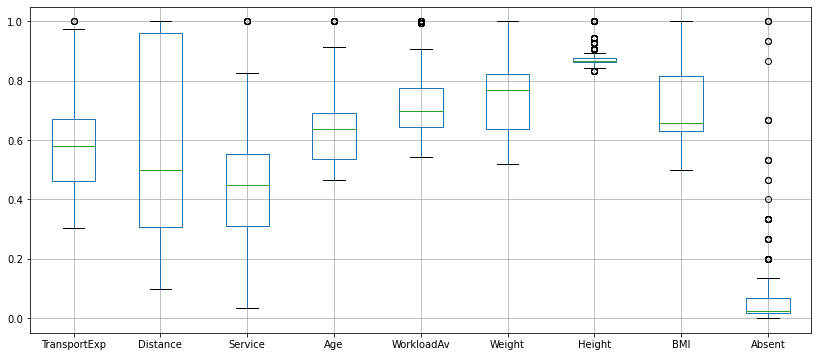

In [428]:
fig, ax = plt.subplots(figsize = (14,6))
scaled_df.boxplot();

All features are scaled within -1 and 1. The max value is 1. The data is scaled but not scaled around mean or median. Not robust so sensitive to outliers in the data. 

### Minmax Scaler

In [433]:
minmaxscaler = MinMaxScaler(feature_range = (1,2)) # can specify the range within which the scaled data will lie
scaled_df2 = pd.DataFrame(minmaxscaler.fit_transform(df))
scaled_df2.columns = df.columns
scaled_df.head()

,TransportExp,Distance,Service,Age,WorkloadAv,Weight,Height,BMI,Absent
0,0.744845,0.692308,0.448276,0.568966,0.632262,0.833333,0.877551,0.789474,0.033333
1,0.304124,0.250000,0.620690,0.862069,0.632262,0.907407,0.908163,0.815789,0.000000
2,0.461340,0.980769,0.620690,0.655172,0.632262,0.824074,0.867347,0.815789,0.016667
3,0.719072,0.096154,0.482759,0.672414,0.632262,0.629630,0.857143,0.631579,0.033333
4,0.744845,0.692308,0.448276,0.568966,0.632262,0.833333,0.877551,0.789474,0.016667


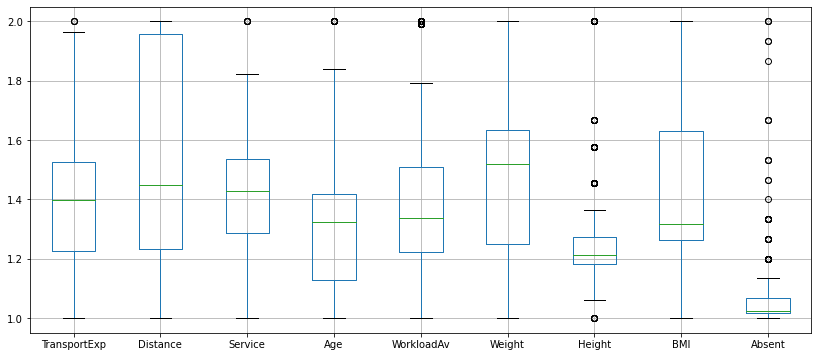

In [434]:
fig, ax = plt.subplots(figsize = (14,6))
scaled_df2.boxplot();

All features scaled are within 1 and 2. Again, not centred around the mean.

## Custom Transforms

In [444]:
x = np.array([[9,25],[100,49]])

In [447]:
trans = FunctionTransformer(np.sqrt, validate=False)
res = trans.transform(x)
res

array([[ 3.,  5.],
       [10.,  7.]])

In [448]:
# Inverse transform
inv = FunctionTransformer(inverse_func=res*res, validate=False)
inv

FunctionTransformer(inverse_func=array([[  9.,  25.],
       [100.,  49.]]))

## Polynomials

In [491]:
# Create polynomials
def poly(x):
    return 3*x*x*x + 2*x*x + 6*x + 12

In [492]:
n_samples = 20
X = np.sort(np.random.rand(n_samples))
x = X.reshape(-1, 1)

In [493]:
y = poly(X) + np.random.randn(n_samples) * 0.1

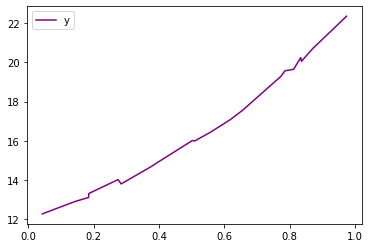

In [501]:
fig, ax = plt.subplots()
plt.plot(x, y , color='purple', label="y")
plt.legend();

* Clearly a non-linear relationship between x and y
* Polynomial features transform allows you to be able to use a linear model

In [502]:
polynomial_features = PolynomialFeatures(degree=3,
                                         include_bias=True)
polynomial_features.fit_transform(x)

array([[1.00000000e+00, 4.22585123e-02, 1.78578186e-03, 7.54644846e-05],
       [1.00000000e+00, 1.44036902e-01, 2.07466292e-02, 2.98828019e-03],
       [1.00000000e+00, 1.84212952e-01, 3.39344118e-02, 6.25115818e-03],
       [1.00000000e+00, 1.85014898e-01, 3.42305124e-02, 6.33315475e-03],
       [1.00000000e+00, 2.74529354e-01, 7.53663665e-02, 2.06902799e-02],
       [1.00000000e+00, 2.84019799e-01, 8.06672465e-02, 2.29110952e-02],
       [1.00000000e+00, 3.79417777e-01, 1.43957849e-01, 5.46201672e-02],
       [1.00000000e+00, 3.92064119e-01, 1.53714273e-01, 6.02658510e-02],
       [1.00000000e+00, 5.02241417e-01, 2.52246441e-01, 1.26688610e-01],
       [1.00000000e+00, 5.08413077e-01, 2.58483856e-01, 1.31416573e-01],
       [1.00000000e+00, 5.57065492e-01, 3.10321963e-01, 1.72869657e-01],
       [1.00000000e+00, 6.17363134e-01, 3.81137240e-01, 2.35300081e-01],
       [1.00000000e+00, 6.55289737e-01, 4.29404639e-01, 2.81384453e-01],
       [1.00000000e+00, 7.72695899e-01, 5.97058952e

In [509]:
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])

In [510]:
pipeline.fit(x, y)
y_predicted = pipeline.predict(x)

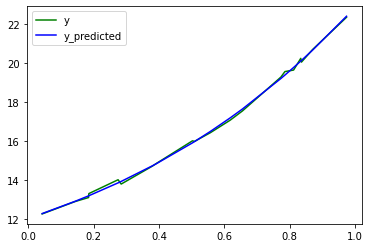

In [514]:
fig, ax = plt.subplots()
plt.plot(x, y, color='green', label="y")
plt.plot(x, y_predicted, color='blue', label="y_predicted")
plt.legend();

## Power Transformer

Maps features to a Gaussian distribution. Often used with heteroscedastic data with non-constant variance
* Box Cox requires positive values
* Yeo Johnson does not

### Box Cox Transform

In [520]:
# Read in analyst forecast data - votes for each analyst with deviation of forecasts by quarter
df = pd.read_csv("C:/Users/imoge/Projects/Datasets/Analyst_Forecasts.csv")

In [519]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Votes
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474,550
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891,670
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515,546
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096,400
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056,572


In [522]:
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']]
y = df[['Votes']]

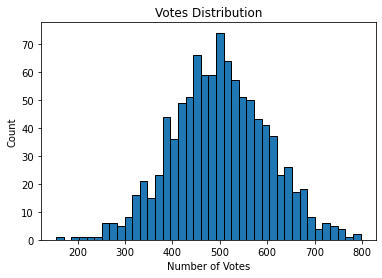

In [525]:
fig, ax = plt.subplots()
plt.hist(df['Votes'], bins=40,ec = 'k')
plt.xlabel('Number of Votes')
plt.ylabel('Count')
plt.title('Votes Distribution')
plt.show()

In [526]:
# Variability of analyst forecasts (Chi-squared which is sum of squares)
df['Variability'] = df[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8']].var(axis=1)
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Votes,Variability
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474,550,0.751824
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891,670,0.350491
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515,546,0.771014
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096,400,1.522004
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056,572,0.709765


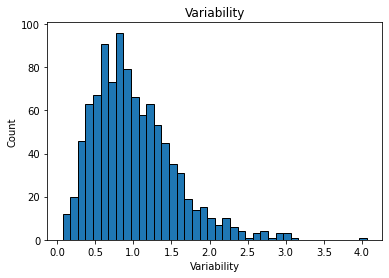

In [528]:
fig, ax = plt.subplots()
plt.hist(df['Variability'], bins=40, ec = 'k')
plt.xlabel('Variability')
plt.ylabel('Count')
plt.title('Variability')
plt.show()

In [529]:
linear_regression = LinearRegression().fit(X, y)
linear_regression.score(X, y)

0.008116291372005646

In [530]:
y_predict = linear_regression.predict(X)

In [531]:
results_df = pd.DataFrame({'y_actual': y['Votes'], 
                           'y_predicted': y_predict.reshape(1, -1)[0]})

results_df.head()

,y_actual,y_predicted
0,550,494.619586
1,670,503.899640
2,546,510.953328
3,400,502.212805
4,572,496.418362


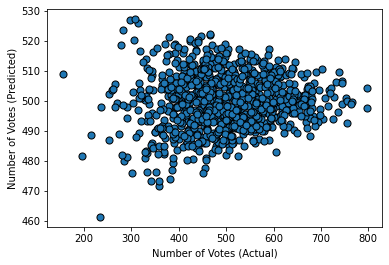

In [537]:
fig, ax = plt.subplots()
plt.scatter(y, y_predict, s=50, ec = 'k')
plt.ylabel('Number of Votes (Predicted)')
plt.xlabel('Number of Votes (Actual)');

No discernible linear relationship

In [538]:
X_chi_sq = df[['Variability']]
X_chi_sq.head()

,Variability
0,0.751824
1,0.350491
2,0.771014
3,1.522004
4,0.709765


In [539]:
power_transformer = PowerTransformer(method='box-cox') # method='yeo-johnson'
X_transformed = power_transformer.fit(X_chi_sq).transform(X_chi_sq)

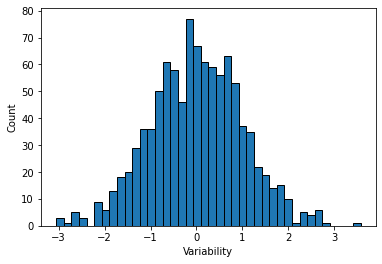

In [540]:
fig, ax = plt.subplots()
plt.hist(X_transformed, bins=40, ec = 'k')
plt.xlabel('Variability')
plt.ylabel('Count')
plt.show()

In [541]:
linear_regression = LinearRegression().fit(X_transformed, y)
linear_regression.score(X_transformed, y)

0.862049887073391

In [542]:
y_predict_transformed = linear_regression.predict(X_transformed).reshape(1, -1)[0]
linear_regression.coef_

array([[-92.83956107]])

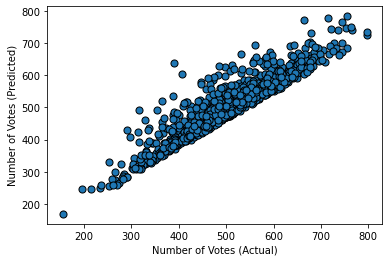

In [545]:
fig, ax = plt.subplots()
plt.scatter(y, y_predict_transformed, s=50, ec = 'k')
plt.ylabel('Number of Votes (Predicted)')
plt.xlabel('Number of Votes (Actual)');

## Quantile Transformers

In [547]:
df = pd.read_csv("C:/Users/imoge/Projects/Datasets/store_visits.csv")

In [548]:
df.head()

,Visits,Revenue,StoreID
0,1023.178663,5165.893314,1
1,1058.607260,5349.036298,1
2,935.069491,4756.347453,1
3,952.360965,4849.804826,1
4,1078.384010,5467.920052,1


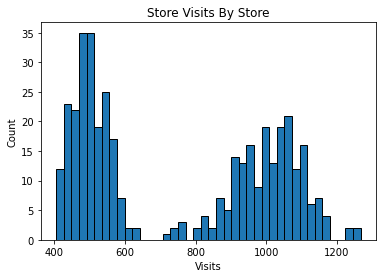

In [559]:
fig, ax = plt.subplots()
plt.hist(df['Visits'], ec = 'k', bins=40)
plt.xlabel('Visits')
plt.ylabel('Count')
plt.title("Store Visits By Store")
plt.show()

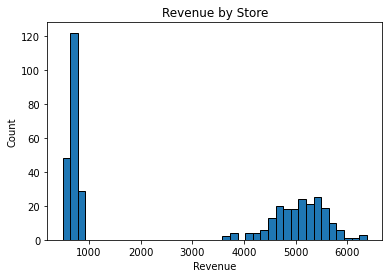

In [560]:
fig, ax = plt.subplots()
plt.hist(df['Revenue'], bins=40, ec = 'k')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Revenue by Store')
plt.show()

In [555]:
transformer = QuantileTransformer(output_distribution='normal') # transform to a normal distribution
store_transform = transformer.fit_transform(df[['Visits','Revenue']])

C:\Users\imoge\Anaconda3\envs\PYTORCH\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (398). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [556]:
store_transform_df = pd.DataFrame(data = store_transform,
                                  columns=['Visits_transform', 'Revenue_transform'])
store_transform_df.head()

,Visits_transform,Revenue_transform
0,0.692434,0.733135
1,0.989501,0.989501
2,0.317809,0.337797
3,0.371416,0.433038
4,1.208903,1.235553


In [558]:
final_df = pd.concat([df, store_transform_df], axis=1)
final_df.head()

,Visits,Revenue,StoreID,Visits_transform,Revenue_transform
0,1023.178663,5165.893314,1,0.692434,0.733135
1,1058.607260,5349.036298,1,0.989501,0.989501
2,935.069491,4756.347453,1,0.317809,0.337797
3,952.360965,4849.804826,1,0.371416,0.433038
4,1078.384010,5467.920052,1,1.208903,1.235553


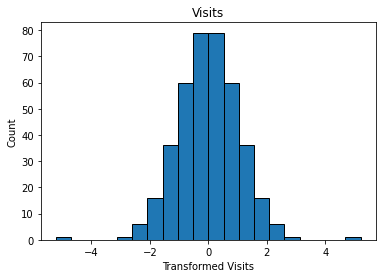

In [565]:
fig, ax = plt.subplots()
plt.hist(final_df['Visits_transform'], edgecolor='k', bins=20)
plt.xlabel('Transformed Visits')
plt.ylabel('Count')
plt.title('Visits')
plt.show()

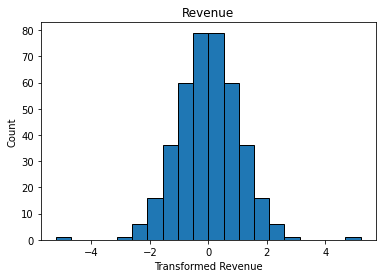

In [567]:
fig, ax = plt.subplots()
plt.hist(final_df['Revenue_transform'], ec = 'k', bins=20)
plt.xlabel('Transformed Revenue')
plt.ylabel('Count')
plt.title('Revenue')
plt.show()

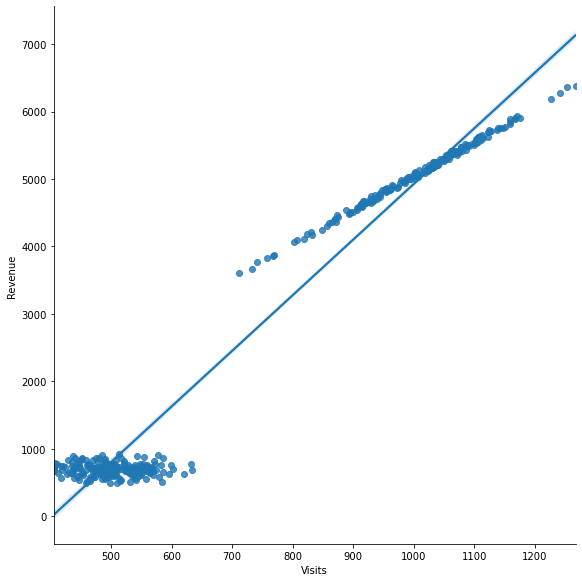

In [568]:
# Non transformed data
sns.lmplot(x="Visits", y="Revenue", data=final_df, height=8);

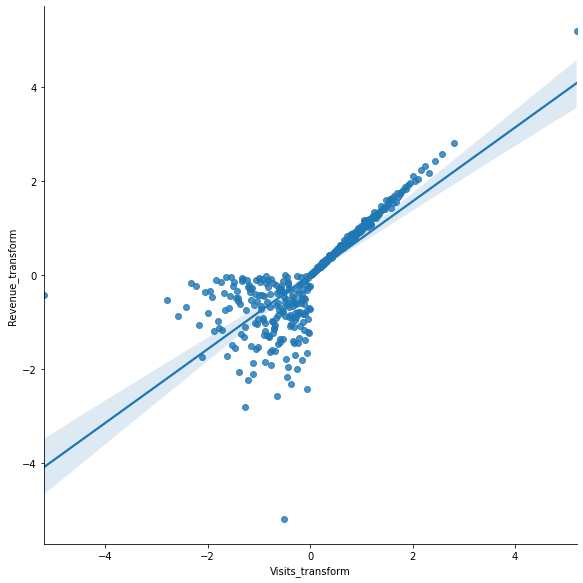

In [569]:
# Transformed data
g = sns.lmplot(x="Visits_transform", y="Revenue_transform", data=final_df, height=8)